In [1]:
import os, sys
import numpy as np
import healpy as hp
import pandas as pd
import h5py
import matplotlib 
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

os.system('module load texlive/2022')

plt.rcParams.update({
    "text.usetex": True,
    "font.family": "Times",
    "font.size"  : 13
})

matplotlib.rcParams.update({'font.size': 15})

matplotlib.rcParams['mathtext.fontset'] = 'stix'
plt.rc('text.latex', preamble=r'\usepackage{/global/cfs/cdirs/lsst/groups/WL/users/yomori/repo/nulltests_txpipe/apjfonts}')
        
#plt.rcParams["font.family"] = "Times New Roman"

plt.rcParams['axes.facecolor']   = 'w'
plt.rcParams['figure.facecolor'] = 'w'


kidscol = '#9CC363'    # light olive
descol  = 'chocolate'  # dark orange
hsccol  = '#5A8BAF'    # lightpurple

Lmod has detected the following error: The following module(s) are unknown:
"texlive/2022"

Please check the spelling or version number. Also try "module spider ..."
It is also possible your cache file is out-of-date; it may help to try:
  $ module --ignore_cache load "texlive/2022"

Also make sure that all modulefiles written in TCL start with the string
#%Module





In [2]:
import h5py
b = b2 = 'all'

des={}
with h5py.File("/pscratch/sd/j/jjeffers/temp/TXPipe/data/desy3/YOCALIB-1000JK-catms/tau_stats-nosw.hdf5", "r") as f:
    print(f['tau_statistics']['bestfits_PSF-reserved'].keys())
    if b == 4:
        print('FIFTH tomographic bin. switching to non-tomographic for DES, HSC')
        b2 = 'all'
        
    des['cov']  = f['tau_statistics']['tau_PSF-reserved'][f'bin_{b2}']['cov'][:]
    des['tht']  = f['tau_statistics']['tau_PSF-reserved'][f'bin_{b2}']['theta'][:]
    des['tau0'] = f['tau_statistics']['tau_PSF-reserved'][f'bin_{b2}']['tau0p'][:]
    des['tau2'] = f['tau_statistics']['tau_PSF-reserved'][f'bin_{b2}']['tau2p'][:]
    des['tau5'] = f['tau_statistics']['tau_PSF-reserved'][f'bin_{b2}']['tau5p'][:]
    des['tau0m'] = f['tau_statistics']['tau_PSF-reserved'][f'bin_{b2}']['tau0m'][:]
    des['tau2m'] = f['tau_statistics']['tau_PSF-reserved'][f'bin_{b2}']['tau2m'][:]
    des['tau5m'] = f['tau_statistics']['tau_PSF-reserved'][f'bin_{b2}']['tau5m'][:]
kids={}
with h5py.File("/pscratch/sd/j/jjeffers/temp/TXPipe/data/kids/TAU_catms/tau_stats.hdf5", "r") as f:
    print(f['tau_statistics']['bestfits_PSF-reserved'].keys())
    kids['cov']  = f['tau_statistics']['tau_PSF-reserved'][f'bin_{b}']['cov'][:]
    kids['tht']  = f['tau_statistics']['tau_PSF-reserved'][f'bin_{b}']['theta'][:]
    kids['tau0'] = f['tau_statistics']['tau_PSF-reserved'][f'bin_{b}']['tau0p'][:]
    kids['tau2'] = f['tau_statistics']['tau_PSF-reserved'][f'bin_{b}']['tau2p'][:]
    kids['tau5'] = f['tau_statistics']['tau_PSF-reserved'][f'bin_{b}']['tau5p'][:]
    kids['tau0m'] = f['tau_statistics']['tau_PSF-reserved'][f'bin_{b}']['tau0m'][:]
    kids['tau2m'] = f['tau_statistics']['tau_PSF-reserved'][f'bin_{b}']['tau2m'][:]
    kids['tau5m'] = f['tau_statistics']['tau_PSF-reserved'][f'bin_{b}']['tau5m'][:]    
hsc={}
with h5py.File("/pscratch/sd/j/jjeffers/temp/TXPipe/data/hsc-y3/outputs/TAU_150JK-catms/tau_stats.hdf5", "r") as f:
    print(f['tau_statistics']['bestfits_PSF-reserved'].keys())
    
    hsc['cov']  = f['tau_statistics']['tau_PSF-reserved'][f'bin_{b2}']['cov'][:]
    hsc['tht']  = f['tau_statistics']['tau_PSF-reserved'][f'bin_{b2}']['theta'][:]
    hsc['tau0'] = f['tau_statistics']['tau_PSF-reserved'][f'bin_{b2}']['tau0p'][:]
    hsc['tau2'] = f['tau_statistics']['tau_PSF-reserved'][f'bin_{b2}']['tau2p'][:]
    hsc['tau5'] = f['tau_statistics']['tau_PSF-reserved'][f'bin_{b2}']['tau5p'][:]
    hsc['tau0m'] = f['tau_statistics']['tau_PSF-reserved'][f'bin_{b2}']['tau0m'][:]
    hsc['tau2m'] = f['tau_statistics']['tau_PSF-reserved'][f'bin_{b2}']['tau2m'][:]
    hsc['tau5m'] = f['tau_statistics']['tau_PSF-reserved'][f'bin_{b2}']['tau5m'][:]
    
    hsc['cov']  = f['tau_statistics']['tau_PSF-reserved'][f'bin_{b2}']['cov'][:]
    hsc['tht']  = f['tau_statistics']['tau_PSF-reserved'][f'bin_{b2}']['theta'][:]
    hsc['tau0'] = f['tau_statistics']['tau_PSF-reserved'][f'bin_{b2}']['tau0p'][:]
    hsc['tau2'] = f['tau_statistics']['tau_PSF-reserved'][f'bin_{b2}']['tau2p'][:]
    hsc['tau5'] = f['tau_statistics']['tau_PSF-reserved'][f'bin_{b2}']['tau5p'][:]
    hsc['tau0m'] = f['tau_statistics']['tau_PSF-reserved'][f'bin_{b2}']['tau0m'][:]
    hsc['tau2m'] = f['tau_statistics']['tau_PSF-reserved'][f'bin_{b2}']['tau2m'][:]
    hsc['tau5m'] = f['tau_statistics']['tau_PSF-reserved'][f'bin_{b2}']['tau5m'][:]


<KeysViewHDF5 ['bin_0', 'bin_1', 'bin_2', 'bin_3', 'bin_all']>
<KeysViewHDF5 ['bin_0', 'bin_1', 'bin_2', 'bin_3', 'bin_4', 'bin_all']>
<KeysViewHDF5 ['bin_0', 'bin_1', 'bin_2', 'bin_3', 'bin_all']>


<Figure size 640x480 with 0 Axes>

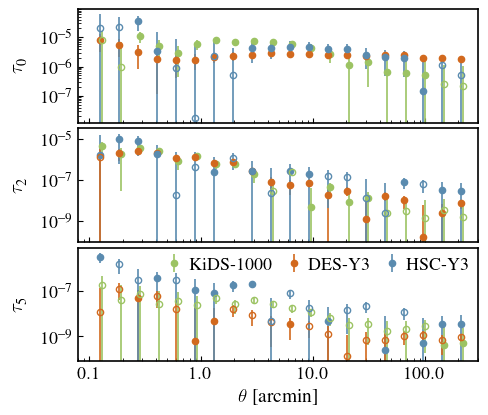

In [23]:
%matplotlib inline
matplotlib.rcParams.update({'font.size': 13})

# CHECK COVARIANCE INDICES AGAIN

plt.clf()
fig = plt.figure(figsize=(5,4),dpi=100)

gs  = gridspec.GridSpec(3, 1, top=0.98, right=0.96, left=0.16, bottom=0.1,hspace=0.05,wspace=0.15)

ax0 = plt.subplot(gs[0])
ax0.set_ylabel(r'$\tau_{0}$',size=14,labelpad=10)
##
ax0.errorbar(10**(np.log10(kids['tht'][kids['tau0']>0])+0.02),kids['tau0'][kids['tau0']>0],yerr=(np.diag(kids['cov'])**0.5)[:20][kids['tau0']>0],marker='o',ls='None',ms=4.5,elinewidth=1.2,color=kidscol,label=r'KiDS-1000')
ax0.errorbar(10**(np.log10(des['tht'][des['tau0']>0])+0.00) ,des['tau0'][des['tau0']>0] ,yerr=(np.diag(des['cov'])**0.5)[:20][des['tau0']>0],marker='o',ls='None',ms=4.5,elinewidth=1.2,color=descol,label=r'DES-Y3')
ax0.errorbar(10**(np.log10(hsc['tht'][hsc['tau0']>0])+0.00) ,hsc['tau0'][hsc['tau0']>0] ,yerr=(np.diag(hsc['cov'])**0.5)[:20][hsc['tau0']>0],marker='o',ls='None',ms=4.5,elinewidth=1.2,color=hsccol,label=r'HSC-Y3')

ax0.errorbar(10**(np.log10(kids['tht'][kids['tau0']<0])+0.02),np.abs(kids['tau0'][kids['tau0']<0]),yerr=(np.diag(kids['cov'])**0.5)[:20][kids['tau0']<0],marker='o',mfc='None',ls='None',ms=4.5,elinewidth=1.2,color=kidscol,)
ax0.errorbar(10**(np.log10(des['tht'][des['tau0']<0])+0.00) ,np.abs(des['tau0'][des['tau0']<0]),yerr=(np.diag(des['cov'])**0.5)[:20][des['tau0']<0],marker='o',mfc='None',ls='None',ms=4.5,elinewidth=1.2,color=descol,)
ax0.errorbar(10**(np.log10(hsc['tht'][hsc['tau0']<0])+0.00) ,np.abs(hsc['tau0'][hsc['tau0']<0]),yerr=(np.diag(hsc['cov'])**0.5)[:20][hsc['tau0']<0],marker='o',mfc='None',ls='None',ms=4.5,elinewidth=1.2,color=hsccol,)

##
ax0.set_yscale('log')
ax0.set_xscale('log')
#ax0.semilogx(np.arange(300),np.zeros(300),color='dimgray',ls='--',lw=0.7,dashes=(5,4))
ax0.tick_params(axis="both",which='both',direction="in")
plt.setp(ax0.get_xticklabels(), visible=False)
ax0.set_xlim(0.08,300)
#------------------------------------------------------------------------------------------
ax1 = plt.subplot(gs[1])
ax1.set_ylabel(r'$\tau_{2}$',size=14,labelpad=10)
##
ax1.errorbar(10**(np.log10(kids['tht'][kids['tau2']>0])+0.02),kids['tau2'][kids['tau2']>0],yerr=(np.diag(kids['cov'])**0.5)[40:60][kids['tau2']>0],marker='o',ls='None',ms=4.5,elinewidth=1.2,color=kidscol,label=r'KiDS-1000')
ax1.errorbar(10**(np.log10(des['tht'][des['tau2']>0])+0.00) ,des['tau2'][des['tau2']>0] ,yerr=(np.diag(des['cov'])**0.5)[40:60][des['tau2']>0],marker='o',ls='None',ms=4.5,elinewidth=1.2,color=descol,label=r'DES-Y3')
ax1.errorbar(10**(np.log10(hsc['tht'][hsc['tau2']>0])+0.00) ,hsc['tau2'][hsc['tau2']>0] ,yerr=(np.diag(hsc['cov'])**0.5)[40:60][hsc['tau2']>0],marker='o',ls='None',ms=4.5,elinewidth=1.2,color=hsccol,label=r'HSC-Y3')

ax1.errorbar(10**(np.log10(kids['tht'][kids['tau2']<0])+0.02),np.abs(kids['tau2'][kids['tau2']<0]),yerr=(np.diag(kids['cov'])**0.5)[40:60][kids['tau2']<0],marker='o',mfc='None',ls='None',ms=4.5,elinewidth=1.2,color=kidscol,)
ax1.errorbar(10**(np.log10(des['tht'][des['tau2']<0])+0.00) ,np.abs(des['tau2'][des['tau2']<0]),yerr=(np.diag(des['cov'])**0.5)[40:60][des['tau2']<0],marker='o',mfc='None',ls='None',ms=4.5,elinewidth=1.2,color=descol,)
ax1.errorbar(10**(np.log10(hsc['tht'][hsc['tau2']<0])+0.00) ,np.abs(hsc['tau2'][hsc['tau2']<0]),yerr=(np.diag(hsc['cov'])**0.5)[40:60][hsc['tau2']<0],marker='o',mfc='None',ls='None',ms=4.5,elinewidth=1.2,color=hsccol,)
##
ax1.set_yscale('log')
ax1.set_xscale('log')
#ax1.semilogx(np.arange(300),np.zeros(300),color='dimgray',ls='--',lw=0.7,dashes=(5,4))
ax1.tick_params(axis="both",which='both',direction="in")
plt.setp(ax1.get_xticklabels(), visible=False)
ax1.set_xlim(0.08,300)
#------------------------------------------------------------------------------------------
ax2 = plt.subplot(gs[2])
ax2.set_ylabel(r'$\tau_{5}$',size=14,labelpad=10)
##
ax2.errorbar(10**(np.log10(kids['tht'][kids['tau5']>0])+0.02),kids['tau5'][kids['tau5']>0],yerr=(np.diag(kids['cov'])**0.5)[80:100][kids['tau5']>0],marker='o',ls='None',ms=4.5,elinewidth=1.2,color=kidscol,label=r'KiDS-1000')
ax2.errorbar(10**(np.log10(des['tht'][des['tau5']>0])+0.00) ,des['tau5'][des['tau5']>0] ,yerr=(np.diag(des['cov'])**0.5)[80:100][des['tau5']>0],marker='o',ls='None',ms=4.5,elinewidth=1.2,color=descol,label=r'DES-Y3')
ax2.errorbar(10**(np.log10(hsc['tht'][hsc['tau5']>0])+0.00) ,hsc['tau5'][hsc['tau5']>0] ,yerr=(np.diag(hsc['cov'])**0.5)[80:100][hsc['tau5']>0],marker='o',ls='None',ms=4.5,elinewidth=1.2,color=hsccol,label=r'HSC-Y3')

ax2.errorbar(10**(np.log10(kids['tht'][kids['tau5']<0])+0.02),np.abs(kids['tau5'][kids['tau5']<0]),yerr=(np.diag(kids['cov'])**0.5)[80:100][kids['tau5']<0],marker='o',mfc='None',ls='None',ms=4.5,elinewidth=1.2,color=kidscol,)
ax2.errorbar(10**(np.log10(des['tht'][des['tau5']<0])+0.00) ,np.abs(des['tau5'][des['tau5']<0]),yerr=(np.diag(des['cov'])**0.5)[80:100][des['tau5']<0],marker='o',mfc='None',ls='None',ms=4.5,elinewidth=1.2,color=descol,)
ax2.errorbar(10**(np.log10(hsc['tht'][hsc['tau5']<0])+0.00) ,np.abs(hsc['tau5'][hsc['tau5']<0]),yerr=(np.diag(hsc['cov'])**0.5)[80:100][hsc['tau5']<0],marker='o',mfc='None',ls='None',ms=4.5,elinewidth=1.2,color=hsccol,)
##
ax2.set_yscale('log')
ax2.set_xscale('log')
#ax2.semilogx(np.arange(300),np.zeros(300),color='dimgray',ls='--',lw=0.7,dashes=(5,4))
ax2.tick_params(axis="both",which='both',direction="in")
ax2.set_xlabel(r'$\theta\ [{\rm arcmin}]$',size=14)
ax2.set_xlim(0.08,300)

ax2.get_xaxis().set_major_formatter(matplotlib.ticker.NullFormatter())
ax2.get_xaxis().set_minor_formatter(matplotlib.ticker.NullFormatter())
ax2.set_xticks([0.1,1,10,100])
ax2.legend(frameon=False,labelspacing=0.05,ncol=3,handletextpad=-0.2,columnspacing=0.2,loc='upper right',borderpad=0)

from matplotlib.ticker import ScalarFormatter
for axis in [ax2.xaxis]:
    axis.set_major_formatter(ScalarFormatter())
    
for axis in ['top','bottom','left','right']:
    ax0.spines[axis].set_linewidth(1.2)
    ax1.spines[axis].set_linewidth(1.2)
    ax2.spines[axis].set_linewidth(1.2)
    
plt.savefig('taustats.pdf',dpi=200,bbox_inches='tight')


# checking fit
This plot does not go into the paper.

In [70]:
params = {}
params['des'] = {}
plist = ['alpha','beta','eta']

with h5py.File("/pscratch/sd/j/jjeffers/temp/TXPipe/data/desy3/YOCALIB-1000JK-catms/tau_stats-nosw.hdf5", "r") as f:
    for p in plist:
        params['des'][f'{p}'] = np.asarray(f['tau_statistics']['bestfits_PSF-reserved'][f'bin_{b2}'][f'{p}'])
params['hsc'] = {}
with h5py.File("/pscratch/sd/j/jjeffers/temp/TXPipe/data/hsc-y3/outputs/TAU_150JK-catms/tau_stats.hdf5", "r") as f:
    for p in plist:
        params['hsc'][f'{p}'] = np.asarray(f['tau_statistics']['bestfits_PSF-reserved'][f'bin_{b2}'][f'{p}'])

params['kids'] = {}
with h5py.File("/pscratch/sd/j/jjeffers/temp/TXPipe/data/kids/TAU_catms/tau_stats.hdf5", "r") as f:
    for p in plist:
        params['kids'][f'{p}'] = np.asarray(f['tau_statistics']['bestfits_PSF-reserved'][f'bin_{b}'][f'{p}'])


In [71]:
rowes = {}

rowes['des'] = {}
with h5py.File('/pscratch/sd/j/jjeffers/temp/TXPipe/data/desy3/YOCALIB-1000JK-catms/rowe_stats.hdf5','r') as f:
    for i in range(6):
        rowes['des'][f'rho{i}'] = f['rowe_statistics'][f'rowe_{i}_PSF-reserved']['xi_plus'][:]
        rowes['des'][f'rho{i}m'] = f['rowe_statistics'][f'rowe_{i}_PSF-reserved']['xi_minus'][:]
        
rowes['hsc'] = {}
with h5py.File('/pscratch/sd/j/jjeffers/temp/TXPipe/data/hsc-y3/outputs/TAU_1000JK-catms/rowe_stats.hdf5','r') as f:
    for i in range(6):
        rowes['hsc'][f'rho{i}'] = f['rowe_statistics'][f'rowe_{i}_PSF-reserved']['xi_plus'][:]
        rowes['hsc'][f'rho{i}m'] = f['rowe_statistics'][f'rowe_{i}_PSF-reserved']['xi_minus'][:]

    
rowes['kids'] = {}
with h5py.File('/pscratch/sd/j/jjeffers/temp/TXPipe/data/kids/TAU_catms/rowe_stats.hdf5','r') as f:
    for i in range(6):
        rowes['kids'][f'rho{i}'] = f['rowe_statistics'][f'rowe_{i}_PSF-reserved']['xi_plus'][:]
        rowes['kids'][f'rho{i}m'] = f['rowe_statistics'][f'rowe_{i}_PSF-reserved']['xi_minus'][:]

In [72]:
fits = {}
fits['des'] = {}
fits['hsc'] = {}
fits['kids'] = {}

surveys = ['des','hsc','kids']
#surveys=['kids']

for s in surveys:
    fits[f'{s}']['tau0'] = params[f'{s}']['alpha']*rowes[f'{s}']['rho0'] + params[f'{s}']['beta']*rowes[f'{s}']['rho2'] + params[f'{s}']['eta']*rowes[f'{s}']['rho5']
    fits[f'{s}']['tau2'] = params[f'{s}']['alpha']*rowes[f'{s}']['rho2'] + params[f'{s}']['beta']*rowes[f'{s}']['rho1'] + params[f'{s}']['eta']*rowes[f'{s}']['rho4']
    fits[f'{s}']['tau5'] = params[f'{s}']['alpha']*rowes[f'{s}']['rho5'] + params[f'{s}']['beta']*rowes[f'{s}']['rho4'] + params[f'{s}']['eta']*rowes[f'{s}']['rho3']
    fits[f'{s}']['tau0m'] = params[f'{s}']['alpha']*rowes[f'{s}']['rho0m'] + params[f'{s}']['beta']*rowes[f'{s}']['rho2m'] + params[f'{s}']['eta']*rowes[f'{s}']['rho5m']
    fits[f'{s}']['tau2m'] = params[f'{s}']['alpha']*rowes[f'{s}']['rho2m'] + params[f'{s}']['beta']*rowes[f'{s}']['rho1m'] + params[f'{s}']['eta']*rowes[f'{s}']['rho4m']
    fits[f'{s}']['tau5m'] = params[f'{s}']['alpha']*rowes[f'{s}']['rho5m'] + params[f'{s}']['beta']*rowes[f'{s}']['rho4m'] + params[f'{s}']['eta']*rowes[f'{s}']['rho3m']


In [ ]:
plt.plot(des['tht'],fits['des']['tau0']/1e-5,color=descol,label = 'DES-Y3')
plt.plot(hsc['tht'],fits['hsc']['tau0']/1e-5,color=hsccol,label='HSC-Y3')
plt.plot(kids['tht'],fits['kids']['tau0']/1e-5,color=kidscol,label='KiDS-1000')
plt.errorbar(10**(np.log10(des['tht'])+0.00) ,des['tau0']/1e-5   ,yerr=(np.diag(des['cov'])**0.5)[:20]/1e-5     ,marker='o',ls='None',ms=4.5,elinewidth=1.2,color=descol)
plt.errorbar(10**(np.log10(kids['tht'])+0.02),kids['tau0']/1e-5  ,yerr=(np.diag(kids['cov'])**0.5)[:20]/1e-5    ,marker='o',ls='None',ms=4.5,elinewidth=1.2,color=kidscol)
plt.errorbar(10**(np.log10(hsc['tht'])+0.04) ,hsc['tau0']/1e-5   ,yerr=(np.diag(hsc['cov'])**0.5)[:20]/1e-5 ,marker='o',ls='None',ms=4.5,elinewidth=1.2,color=hsccol)
plt.xscale('log')
plt.ylabel(r'$\tau_0+$')
plt.xlabel(r'$\theta$')
plt.legend(loc = 'lower right')

In [ ]:
plt.plot(des['tht'],des['tht']*fits['des']['tau2']/1e-5,color=descol,label = 'DES-Y3')
plt.plot(hsc['tht'],hsc['tht']*fits['hsc']['tau2']/1e-5,color=hsccol,label='HSC-Y3')
plt.plot(kids['tht'],kids['tht']*fits['kids']['tau2']/1e-5,color=kidscol,label='KiDS-1000')
plt.errorbar(10**(np.log10(des['tht'])+0.00) ,des['tht']*des['tau2']/1e-5  ,yerr=des['tht']*(np.diag(des['cov'])**0.5)[40:60]/1e-5  ,marker='o',ls='None',ms=4.5,elinewidth=1.2,color=descol)
plt.errorbar(10**(np.log10(kids['tht'])+0.02),kids['tht']*kids['tau2']/1e-5,yerr=kids['tht']*(np.diag(kids['cov'])**0.5)[40:60]/1e-5,marker='o',ls='None',ms=4.5,elinewidth=1.2,color=kidscol)
plt.errorbar(10**(np.log10(hsc['tht'])+0.04) ,hsc['tht']*hsc['tau2']/1e-5  ,yerr=hsc['tht']*(np.diag(hsc['cov'])**0.5)[40:60]/1e-5  ,marker='o',ls='None',ms=4.5,elinewidth=1.2,color=hsccol)

plt.xscale('log')
plt.ylabel(r'$\theta \tau_2+$')
plt.xlabel(r'$\theta$')

plt.legend(loc='upper left')

In [ ]:
plt.plot(des['tht'],des['tht']*fits['des']['tau5']/1e-6 ,color=descol,label = 'DES-Y3')
plt.plot(hsc['tht'],hsc['tht']*fits['hsc']['tau5']/1e-6 ,color=hsccol,label='HSC-Y3')
plt.plot(kids['tht'],kids['tht']*fits['kids']['tau5']/1e-6 ,color=kidscol,label='KiDS-1000')
plt.errorbar(10**(np.log10(des['tht'])+0.00) ,des['tht']*des['tau5']/1e-6      ,yerr=des['tht']*(np.diag(des['cov'])**0.5)[80:100]/1e-6     ,marker='o',ls='None',ms=4.5,elinewidth=1.2,color=descol)
plt.errorbar(10**(np.log10(kids['tht'])+0.02),kids['tht']*kids['tau5']/1e-6,yerr=kids['tht']*(np.diag(kids['cov'])**0.5)[80:100]/1e-6,marker='o',ls='None',ms=4.5,elinewidth=1.2,color=kidscol)
plt.errorbar(10**(np.log10(hsc['tht'])+0.04) ,hsc['tht']*hsc['tau5']/1e-6      ,yerr=hsc['tht']*(np.diag(hsc['cov'])**0.5)[80:100]/1e-6      ,marker='o',ls='None',ms=4.5,elinewidth=1.2,color=hsccol)
plt.xscale('log')
plt.ylabel(r'$\theta \tau_5+$')
plt.xlabel(r'$\theta$')

plt.legend(loc='lower left')

In [6]:
def chi2(cov,Njk,Tall,Xall):
    mask   = cov.diagonal() > 0
    cov    = cov[mask][:, mask]
    # We debias the covariance with two correction factors from Hartlap et. al 2006 eq. 17 and Dodelson & Schneider 2013 eq. 28
    ndim = 3
    Ndv    = 6*20
    if not Ndv < Njk - 2:
        raise ValueError("Hartlap correction only valid for N data vector elements < N jackknife patches - 2")
    f_H    = 1.*(Njk-(Ndv-ndim)-2)/(Njk-1)
    f_DS   = 1/(1+(Ndv-ndim)*(Njk-Ndv-2)/(Njk-Ndv-1)/(Njk-Ndv-4))
    cov    = cov / f_H / f_DS 
    Tall  = Tall[mask]
    Xall  = Xall[mask]
    dof  = Ndv - ndim
    return np.dot(Xall-Tall,np.dot(Xall-Tall,np.linalg.inv(cov)))/dof

In [73]:

dTall = np.concatenate([fits['des']['tau0'], fits['des']['tau0m'],
                           fits['des']['tau2'], fits['des']['tau2m'],
                           fits['des']['tau5'], fits['des']['tau5m']])
dXall = np.concatenate([des['tau0'],des['tau0m'],
                           des['tau2'],des['tau2m'],
                           des['tau5'],des['tau5m']])


hTall = np.concatenate([fits['hsc']['tau0'], fits['hsc']['tau0m'],
                           fits['hsc']['tau2'], fits['hsc']['tau2m'],
                           fits['hsc']['tau5'], fits['hsc']['tau5m']])
hXall = np.concatenate([hsc['tau0'],hsc['tau0m'],
                           hsc['tau2'],hsc['tau2m'],
                           hsc['tau5'],hsc['tau5m']])


kTall = np.concatenate([fits['kids']['tau0'], fits['kids']['tau0m'],
                           fits['kids']['tau2'], fits['kids']['tau2m'],
                           fits['kids']['tau5'], fits['kids']['tau5m']])
kXall = np.concatenate([kids['tau0'],kids['tau0m'],
                           kids['tau2'],kids['tau2m'],
                           kids['tau5'],kids['tau5m']])

In [76]:
chi2(des['cov'],1000,dTall,dXall)

0.9667772878240595

In [74]:
chi2(hsc['cov'],150,hTall,hXall)

0.3890603713512507

In [75]:
chi2(kids['cov'],250,kTall,kXall)

0.7841415433075155